In [ ]:
import os
import json
import zipfile
import shutil
import pandas as pd

# ----------------------------
# Step 1: Setup Kaggle API
# ----------------------------
kaggle_creds = {
    "username": "xyz",  # replace with your Kaggle username
    "key": "your_kaggle_api_key_here"  # replace with your actual Kaggle API key
}

os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)
with open(os.path.expanduser("~/.kaggle/kaggle.json"), "w") as f:
    json.dump(kaggle_creds, f)
os.chmod(os.path.expanduser("~/.kaggle/kaggle.json"), 0o600)

# ----------------------------
# Step 2: Download and unzip
# ----------------------------
zip_file = "140k-real-and-fake-faces.zip"
if not os.path.exists(zip_file):
    os.system("kaggle datasets download -d xhlulu/140k-real-and-fake-faces")
else:
    print(" Zip file already exists")

extracted_path = "real_fake_faces_raw"
if not os.path.exists(extracted_path):
    os.makedirs(extracted_path, exist_ok=True)
    with zipfile.ZipFile(zip_file, "r") as zip_ref:
        zip_ref.extractall(extracted_path)
else:
    print(" Dataset already extracted")

# ----------------------------
# Step 3: Locate real/fake folders
# ----------------------------
def find_class_folders(root_path):
    real_path = fake_path = None
    for root, dirs, files in os.walk(root_path):
        for d in dirs:
            d_lower = d.lower()
            if "real" in d_lower and not real_path:
                real_path = os.path.join(root, d)
            elif "fake" in d_lower and not fake_path:
                fake_path = os.path.join(root, d)
    return real_path, fake_path

real_src, fake_src = find_class_folders(extracted_path)
if not real_src or not fake_src:
    raise FileNotFoundError("❌ Could not find folders for real and fake images.")

print(f" Real images folder: {real_src}")
print(f" Fake images folder: {fake_src}")

# ----------------------------
# Step 4: Copy all images
# ----------------------------
def copy_all_images(src, dst):
    os.makedirs(dst, exist_ok=True)
    for file in os.listdir(src):
        if file.lower().endswith((".jpg", ".jpeg", ".png")):
            shutil.copy(os.path.join(src, file), os.path.join(dst, file))

final_dataset_path = "Final Dataset"
real_dst = os.path.join(final_dataset_path, "real")
fake_dst = os.path.join(final_dataset_path, "fake")

print(" Copying real images...")
copy_all_images(real_src, real_dst)

print(" Copying fake images...")
copy_all_images(fake_src, fake_dst)

# ----------------------------
# Step 5: Create dataset.csv
# ----------------------------
print(" Creating dataset.csv...")
rows = []
for cls in ["real", "fake"]:
    img_dir = os.path.join(final_dataset_path, cls)
    label = 0 if cls == "real" else 1
    for img_name in os.listdir(img_dir):
        if img_name.lower().endswith((".jpg", ".jpeg", ".png")):
            rows.append([f"{cls}/{img_name}", label])

df = pd.DataFrame(rows, columns=["image_path", "label"])
df.to_csv(os.path.join(final_dataset_path, "dataset.csv"), index=False)

# ----------------------------
# Done!
# ----------------------------
print(" All images copied!")
print(" Final Dataset is ready with structure:")
print(" - Final Dataset/real/")
print(" - Final Dataset/fake/")
print(" - Final Dataset/dataset.csv")


Zip file already exists
Dataset already extracted
Real images folder: deepfake_dataset_raw/Final Dataset/Real
Fake images folder: deepfake_dataset_raw/Final Dataset/Fake
Copying real images...
Copying fake images...
Creating dataset.csv...
All images copied!
Final Dataset is ready with structure:
 - Final Dataset/real/
 - Final Dataset/fake/
 - Final Dataset/dataset.csv


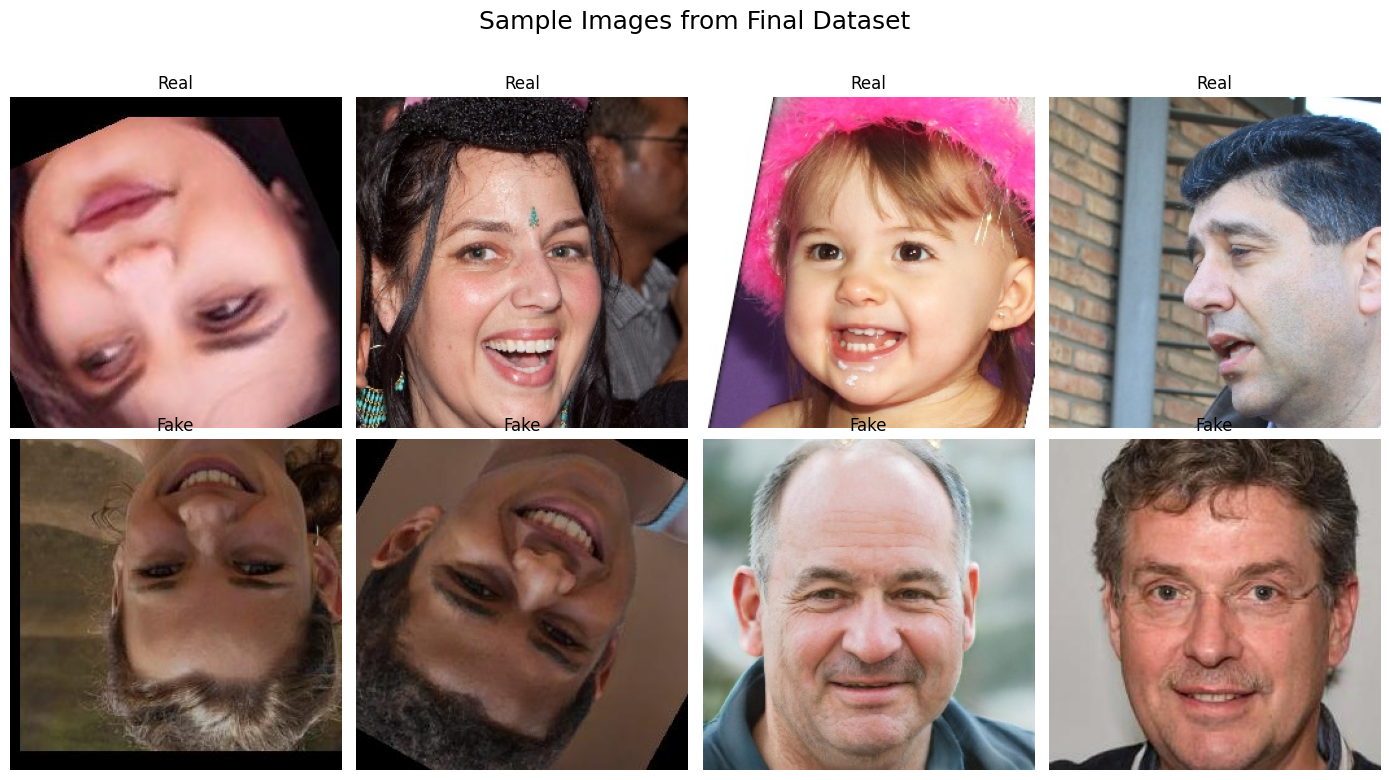

In [ ]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Updated paths
paths = {
    "Real": "Final Dataset/real",
    "Fake": "Final Dataset/fake"
}

# Plot 4 random images per category
fig, axes = plt.subplots(2, 4, figsize=(14, 8))
fig.suptitle("Sample Images from Final Dataset", fontsize=18)

for i, (label, folder) in enumerate(paths.items()):
    images = [f for f in os.listdir(folder) if f.lower().endswith((".jpg", ".jpeg", ".png"))]
    samples = random.sample(images, 4)
    for j, img_name in enumerate(samples):
        img_path = os.path.join(folder, img_name)
        img = Image.open(img_path)
        axes[i][j].imshow(img)
        axes[i][j].axis("off")
        axes[i][j].set_title(f"{label}")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
!pip install torch torchvision torchaudio
!pip install timm
!pip install scikit-learn
!pip install matplotlib seaborn
!pip install opencv-python
!pip install albumentations
!pip install wandb
!pip install tensorboard


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
import timm
import numpy as np
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
import albumentations as A
from albumentations.pytorch import ToTensorV2
import logging
import warnings
from tqdm import tqdm
import json
from datetime import datetime
import random
from collections import OrderedDict

warnings.filterwarnings('ignore')

# Set random seeds for reproducibility
def set_seed(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)


In [ ]:
import os
import torch

class Config:
    def __init__(self):
        #  Corrected data paths with lowercase folder names
        self.data_root = "/content/Final Dataset"
        self.train_real_path = os.path.join(self.data_root, "real")
        self.train_fake_path = os.path.join(self.data_root, "fake")
        self.test_real_path = os.path.join(self.data_root, "real")  # Adjust if using a separate test split
        self.test_fake_path = os.path.join(self.data_root, "fake")

        # Model parameters
        self.model_name = "resnext50_32x4d"
        self.img_size = 224
        self.num_classes = 2
        self.dropout_rate = 0.3

        # Lattice parameters (if used)
        self.lattice_dimension = 256
        self.noise_std = 0.1
        self.lattice_layers = 2

        # Training parameters
        self.batch_size = 32
        self.num_epochs = 50
        self.learning_rate = 1e-4
        self.weight_decay = 1e-4
        self.patience = 10
        self.min_delta = 1e-4

        # Hardware
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        self.num_workers = 2

        # Output
        self.model_save_path = "/content/best_deepfake_model.pth"
        self.log_dir = "/content/logs"

# Initialize config
config = Config()

#  Confirm paths
print(f"✅ Using data from: {config.data_root}")
print("Train real exists:", os.path.exists(config.train_real_path))
print("Train fake exists:", os.path.exists(config.train_fake_path))
print("Test real exists:", os.path.exists(config.test_real_path))
print("Test fake exists:", os.path.exists(config.test_fake_path))


✅ Using data from: /content/Final Dataset
Train real exists: True
Train fake exists: True
Test real exists: True
Test fake exists: True


In [ ]:
# Cell 4: Lattice-Based Learning with Errors Module
class LatticeLayer(nn.Module):
    """
    Lattice-based learning layer that adds structured noise based on lattice theory
    This implements a simplified version of Learning with Errors (LWE) concept
    """
    def __init__(self, input_dim, output_dim, noise_std=0.1):
        super(LatticeLayer, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.noise_std = noise_std

        # Lattice basis matrix (learnable)
        self.lattice_basis = nn.Parameter(torch.randn(input_dim, output_dim) * 0.1)

        # Error distribution parameters
        self.error_scale = nn.Parameter(torch.ones(output_dim) * noise_std)

        # Normalization
        self.layer_norm = nn.LayerNorm(output_dim)

    def forward(self, x):
        batch_size = x.size(0)

        # Linear transformation through lattice basis
        lattice_output = torch.matmul(x, self.lattice_basis)

        # Add structured noise (Learning with Errors)
        if self.training:
            # Generate noise from learnable error distribution
            noise = torch.randn_like(lattice_output) * self.error_scale.unsqueeze(0)
            lattice_output = lattice_output + noise

        # Apply layer normalization
        output = self.layer_norm(lattice_output)

        return output

class LatticeCryptoModule(nn.Module):
    """
    Advanced lattice-based cryptographic learning module
    """
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2, noise_std=0.1):
        super(LatticeCryptoModule, self).__init__()

        self.layers = nn.ModuleList()

        # First layer
        self.layers.append(LatticeLayer(input_dim, hidden_dim, noise_std))

        # Hidden layers
        for _ in range(num_layers - 1):
            self.layers.append(LatticeLayer(hidden_dim, hidden_dim, noise_std))

        # Output projection
        self.output_proj = nn.Linear(hidden_dim, output_dim)
        self.activation = nn.GELU()
        self.dropout = nn.Dropout(0.1)

    def forward(self, x):
        for layer in self.layers:
            x = self.activation(layer(x))
            x = self.dropout(x)

        return self.output_proj(x)


In [ ]:
# Cell 5: Advanced ResNeXt Model with Lattice Integration
class AdvancedResNeXtDeepfakeDetector(nn.Module):
    """
    Production-grade deepfake detector combining ResNeXt with lattice-based learning
    """
    def __init__(self, config):
        super(AdvancedResNeXtDeepfakeDetector, self).__init__()

        # Load pre-trained ResNeXt
        self.backbone = timm.create_model(
            config.model_name,
            pretrained=True,
            num_classes=0, 
            global_pool='avg'
        )

        # Get feature dimension
        self.feature_dim = self.backbone.num_features

        # Lattice-based feature enhancement
        self.lattice_module = LatticeCryptoModule(
            input_dim=self.feature_dim,
            hidden_dim=config.lattice_dimension,
            output_dim=config.lattice_dimension,
            num_layers=config.lattice_layers,
            noise_std=config.noise_std
        )

        # Additional feature processing
        self.feature_enhancement = nn.Sequential(
            nn.Linear(self.feature_dim + config.lattice_dimension, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(inplace=True),
            nn.Dropout(config.dropout_rate),

            nn.Linear(512, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(inplace=True),
            nn.Dropout(config.dropout_rate),
        )

        # Classification head
        self.classifier = nn.Sequential(
            nn.Linear(256, 64),
            nn.ReLU(inplace=True),
            nn.Dropout(config.dropout_rate),
            nn.Linear(64, config.num_classes)
        )

        # Attention mechanism for feature weighting
        self.attention = nn.Sequential(
            nn.Linear(256, 128),
            nn.ReLU(inplace=True),
            nn.Linear(128, 256),
            nn.Sigmoid()
        )

    def forward(self, x):
        # Extract backbone features
        backbone_features = self.backbone(x)

        # Apply lattice-based enhancement
        lattice_features = self.lattice_module(backbone_features)

        # Concatenate original and lattice features
        combined_features = torch.cat([backbone_features, lattice_features], dim=1)

        # Feature enhancement
        enhanced_features = self.feature_enhancement(combined_features)

        # Apply attention
        attention_weights = self.attention(enhanced_features)
        attended_features = enhanced_features * attention_weights

        # Classification
        logits = self.classifier(attended_features)

        return logits, attended_features  # Return features for analysis


In [ ]:
# Cell 6: Advanced Data Augmentation
class AdvancedAugmentation:
    def __init__(self, img_size=224, is_training=True):
        self.img_size = img_size
        self.is_training = is_training

    def get_train_transforms(self):
        return A.Compose([
            A.Resize(self.img_size + 32, self.img_size + 32),
            A.RandomCrop(self.img_size, self.img_size),
            A.HorizontalFlip(p=0.5),
            A.VerticalFlip(p=0.1),
            A.Rotate(limit=15, p=0.3),
            A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.3),
            A.HueSaturationValue(hue_shift_limit=10, sat_shift_limit=20, val_shift_limit=10, p=0.3),
            A.GaussNoise(var_limit=(10, 50), p=0.2),
            A.GaussianBlur(blur_limit=3, p=0.1),
            A.CLAHE(clip_limit=2.0, p=0.1),
            A.CoarseDropout(max_holes=1, max_height=32, max_width=32, p=0.3),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

    def get_val_transforms(self):
        return A.Compose([
            A.Resize(self.img_size, self.img_size),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

In [ ]:
# Cell 7: Custom Dataset Class
class DeepfakeDataset(Dataset):
    def __init__(self, real_path, fake_path, transforms=None, is_training=True):
        self.transforms = transforms
        self.is_training = is_training

        # Load image paths and labels
        self.image_paths = []
        self.labels = []

        # Real images (label 0)
        if os.path.exists(real_path):
            real_images = [os.path.join(real_path, f) for f in os.listdir(real_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            self.image_paths.extend(real_images)
            self.labels.extend([0] * len(real_images))

        # Fake images (label 1)
        if os.path.exists(fake_path):
            fake_images = [os.path.join(fake_path, f) for f in os.listdir(fake_path)
                          if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            self.image_paths.extend(fake_images)
            self.labels.extend([1] * len(fake_images))

        print(f"Dataset loaded: {len(self.image_paths)} images")
        print(f"Real: {self.labels.count(0)}, Fake: {self.labels.count(1)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image_path = self.image_paths[idx]
        label = self.labels[idx]

        try:
            # Load image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Apply transforms
            if self.transforms:
                transformed = self.transforms(image=image)
                image = transformed['image']
            else:
                image = torch.from_numpy(image).permute(2, 0, 1).float() / 255.0

            return image, torch.tensor(label, dtype=torch.long)

        except Exception as e:
            print(f"Error loading image {image_path}: {e}")
            # Return a dummy tensor in case of error
            return torch.zeros(3, config.img_size, config.img_size), torch.tensor(0, dtype=torch.long)


In [ ]:
# Cell 8: Data Loading and Preparation
def create_data_loaders(config):
    # Initialize augmentation
    aug = AdvancedAugmentation(config.img_size)

    # Create datasets
    train_dataset = DeepfakeDataset(
        config.train_real_path,
        config.train_fake_path,
        transforms=aug.get_train_transforms(),
        is_training=True
    )

    test_dataset = DeepfakeDataset(
        config.test_real_path,
        config.test_fake_path,
        transforms=aug.get_val_transforms(),
        is_training=False
    )

    # Split training data for validation
    train_indices = list(range(len(train_dataset)))
    train_idx, val_idx = train_test_split(
        train_indices,
        test_size=0.2,
        random_state=42,
        stratify=[train_dataset.labels[i] for i in train_indices]
    )

    # Create subset datasets
    train_subset = torch.utils.data.Subset(train_dataset, train_idx)
    val_subset = torch.utils.data.Subset(train_dataset, val_idx)

    # Create data loaders
    train_loader = DataLoader(
        train_subset,
        batch_size=config.batch_size,
        shuffle=True,
        num_workers=config.num_workers,
        pin_memory=True,
        drop_last=True
    )

    val_loader = DataLoader(
        val_subset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=config.batch_size,
        shuffle=False,
        num_workers=config.num_workers,
        pin_memory=True
    )

    return train_loader, val_loader, test_loader

# Create data loaders
train_loader, val_loader, test_loader = create_data_loaders(config)


In [ ]:
# Cell 9: Advanced Loss Functions
class FocalLoss(nn.Module):
    def __init__(self, alpha=1, gamma=2, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        pt = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - pt) ** self.gamma * ce_loss

        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.1, dim=1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)
        with torch.no_grad():
            true_dist = torch.zeros_like(pred)
            true_dist.fill_(self.smoothing / (self.cls - 1))
            true_dist.scatter_(1, target.data.unsqueeze(1), self.confidence)
        return torch.mean(torch.sum(-true_dist * pred, dim=self.dim))


In [ ]:
# Cell 10: Training Class with Advanced Features
class DeepfakeTrainer:
    def __init__(self, model, config):
        self.model = model
        self.config = config
        self.device = config.device

        # Initialize optimizers and schedulers
        self.optimizer = optim.AdamW(
            model.parameters(),
            lr=config.learning_rate,
            weight_decay=config.weight_decay
        )

        self.scheduler = optim.lr_scheduler.CosineAnnealingWarmRestarts(
            self.optimizer, T_0=10, T_mult=1, eta_min=1e-6
        )

        # Loss functions
        self.focal_loss = FocalLoss(alpha=2, gamma=2)
        self.label_smooth_loss = LabelSmoothingLoss(classes=2, smoothing=0.1)

        # Tracking variables
        self.best_val_acc = 0.0
        self.patience_counter = 0
        self.train_losses = []
        self.val_losses = []
        self.train_accs = []
        self.val_accs = []

    def train_epoch(self, train_loader):
        self.model.train()
        total_loss = 0
        correct = 0
        total = 0

        pbar = tqdm(train_loader, desc='Training')
        for batch_idx, (data, target) in enumerate(pbar):
            data, target = data.to(self.device), target.to(self.device)

            self.optimizer.zero_grad()

            output, features = self.model(data)

            # Combined loss
            focal_loss = self.focal_loss(output, target)
            smooth_loss = self.label_smooth_loss(output, target)
            loss = 0.7 * focal_loss + 0.3 * smooth_loss

            loss.backward()

            # Gradient clipping
            torch.nn.utils.clip_grad_norm_(self.model.parameters(), max_norm=1.0)

            self.optimizer.step()

            total_loss += loss.item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
            total += target.size(0)

            pbar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Acc': f'{100. * correct / total:.2f}%'
            })

        return total_loss / len(train_loader), 100. * correct / total

    def validate(self, val_loader):
        self.model.eval()
        total_loss = 0
        correct = 0
        total = 0
        all_preds = []
        all_targets = []

        with torch.no_grad():
            for data, target in tqdm(val_loader, desc='Validation'):
                data, target = data.to(self.device), target.to(self.device)

                output, features = self.model(data)
                loss = F.cross_entropy(output, target)

                total_loss += loss.item()
                pred = output.argmax(dim=1, keepdim=True)
                correct += pred.eq(target.view_as(pred)).sum().item()
                total += target.size(0)

                all_preds.extend(pred.cpu().numpy().flatten())
                all_targets.extend(target.cpu().numpy().flatten())

        accuracy = 100. * correct / total
        return total_loss / len(val_loader), accuracy, all_preds, all_targets

    def train(self, train_loader, val_loader):
        print("Starting training...")

        for epoch in range(self.config.num_epochs):
            print(f'\nEpoch {epoch + 1}/{self.config.num_epochs}')

            # Training
            train_loss, train_acc = self.train_epoch(train_loader)

            # Validation
            val_loss, val_acc, val_preds, val_targets = self.validate(val_loader)

            # Update scheduler
            self.scheduler.step()

            # Store metrics
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)
            self.train_accs.append(train_acc)
            self.val_accs.append(val_acc)

            print(f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%')
            print(f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')
            print(f'Learning Rate: {self.optimizer.param_groups[0]["lr"]:.6f}')

            # Early stopping and model saving
            if val_acc > self.best_val_acc + self.config.min_delta:
                self.best_val_acc = val_acc
                self.patience_counter = 0

                # Save best model
                torch.save({
                    'epoch': epoch,
                    'model_state_dict': self.model.state_dict(),
                    'optimizer_state_dict': self.optimizer.state_dict(),
                    'best_val_acc': self.best_val_acc,
                    'config': self.config.__dict__
                }, self.config.model_save_path)

                print(f'New best model saved with validation accuracy: {val_acc:.2f}%')
            else:
                self.patience_counter += 1

            if self.patience_counter >= self.config.patience:
                print(f'Early stopping triggered after {epoch + 1} epochs')
                break

        print(f'\nTraining completed. Best validation accuracy: {self.best_val_acc:.2f}%')


In [ ]:
# Cell 11: Model Initialization and Training
# Initialize model
model = AdvancedResNeXtDeepfakeDetector(config).to(config.device)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f'Total parameters: {total_params:,}')
print(f'Trainable parameters: {trainable_params:,}')

# Initialize trainer
trainer = DeepfakeTrainer(model, config)

# Start training
trainer.train(train_loader, val_loader)


model.safetensors:   0%|          | 0.00/100M [00:00<?, ?B/s]

Total parameters: 25,032,578
Trainable parameters: 25,032,578
Starting training...

Epoch 1/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.29it/s]


Train Loss: 0.3529, Train Acc: 73.74%
Val Loss: 0.4129, Val Acc: 82.39%
Learning Rate: 0.000098
New best model saved with validation accuracy: 82.39%

Epoch 2/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.34it/s]


Train Loss: 0.2704, Train Acc: 84.34%
Val Loss: 0.3526, Val Acc: 85.80%
Learning Rate: 0.000091
New best model saved with validation accuracy: 85.80%

Epoch 3/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.34it/s]


Train Loss: 0.2392, Train Acc: 87.72%
Val Loss: 0.3070, Val Acc: 89.76%
Learning Rate: 0.000080
New best model saved with validation accuracy: 89.76%

Epoch 4/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.56it/s]


Train Loss: 0.2190, Train Acc: 89.61%
Val Loss: 0.2731, Val Acc: 90.03%
Learning Rate: 0.000066
New best model saved with validation accuracy: 90.03%

Epoch 5/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.37it/s]


Train Loss: 0.2065, Train Acc: 90.97%
Val Loss: 0.2560, Val Acc: 92.28%
Learning Rate: 0.000051
New best model saved with validation accuracy: 92.28%

Epoch 6/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.36it/s]


Train Loss: 0.1978, Train Acc: 92.23%
Val Loss: 0.2443, Val Acc: 92.01%
Learning Rate: 0.000035

Epoch 7/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.70it/s]


Train Loss: 0.1859, Train Acc: 93.17%
Val Loss: 0.2380, Val Acc: 92.86%
Learning Rate: 0.000021
New best model saved with validation accuracy: 92.86%

Epoch 8/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.31it/s]


Train Loss: 0.1864, Train Acc: 93.30%
Val Loss: 0.2256, Val Acc: 93.48%
Learning Rate: 0.000010
New best model saved with validation accuracy: 93.48%

Epoch 9/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.38it/s]


Train Loss: 0.1747, Train Acc: 93.94%
Val Loss: 0.2247, Val Acc: 93.56%
Learning Rate: 0.000003
New best model saved with validation accuracy: 93.56%

Epoch 10/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.68it/s]


Train Loss: 0.1801, Train Acc: 93.55%
Val Loss: 0.2184, Val Acc: 93.75%
Learning Rate: 0.000100
New best model saved with validation accuracy: 93.75%

Epoch 11/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.22it/s]


Train Loss: 0.1944, Train Acc: 92.29%
Val Loss: 0.2493, Val Acc: 93.10%
Learning Rate: 0.000098

Epoch 12/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.31it/s]


Train Loss: 0.1886, Train Acc: 93.21%
Val Loss: 0.2388, Val Acc: 93.60%
Learning Rate: 0.000091

Epoch 13/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.26it/s]


Train Loss: 0.1848, Train Acc: 93.41%
Val Loss: 0.2263, Val Acc: 93.17%
Learning Rate: 0.000080

Epoch 14/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.56it/s]


Train Loss: 0.1792, Train Acc: 93.64%
Val Loss: 0.2290, Val Acc: 93.72%
Learning Rate: 0.000066

Epoch 15/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.30it/s]


Train Loss: 0.1751, Train Acc: 94.08%
Val Loss: 0.2146, Val Acc: 94.69%
Learning Rate: 0.000051
New best model saved with validation accuracy: 94.69%

Epoch 16/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.30it/s]


Train Loss: 0.1712, Train Acc: 94.53%
Val Loss: 0.2187, Val Acc: 94.26%
Learning Rate: 0.000035

Epoch 17/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.32it/s]


Train Loss: 0.1660, Train Acc: 94.77%
Val Loss: 0.2011, Val Acc: 94.84%
Learning Rate: 0.000021
New best model saved with validation accuracy: 94.84%

Epoch 18/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.54it/s]


Train Loss: 0.1564, Train Acc: 95.54%
Val Loss: 0.2036, Val Acc: 95.50%
Learning Rate: 0.000010
New best model saved with validation accuracy: 95.50%

Epoch 19/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.35it/s]


Train Loss: 0.1567, Train Acc: 95.76%
Val Loss: 0.1953, Val Acc: 95.00%
Learning Rate: 0.000003

Epoch 20/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.29it/s]


Train Loss: 0.1585, Train Acc: 95.68%
Val Loss: 0.1924, Val Acc: 95.42%
Learning Rate: 0.000100

Epoch 21/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.30it/s]


Train Loss: 0.1711, Train Acc: 94.73%
Val Loss: 0.2218, Val Acc: 93.64%
Learning Rate: 0.000098

Epoch 22/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.47it/s]


Train Loss: 0.1680, Train Acc: 94.86%
Val Loss: 0.2119, Val Acc: 94.10%
Learning Rate: 0.000091

Epoch 23/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.37it/s]


Train Loss: 0.1661, Train Acc: 94.88%
Val Loss: 0.2087, Val Acc: 94.38%
Learning Rate: 0.000080

Epoch 24/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.33it/s]


Train Loss: 0.1631, Train Acc: 95.22%
Val Loss: 0.2056, Val Acc: 94.80%
Learning Rate: 0.000066

Epoch 25/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.24it/s]


Train Loss: 0.1551, Train Acc: 95.92%
Val Loss: 0.2006, Val Acc: 94.26%
Learning Rate: 0.000051

Epoch 26/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.51it/s]


Train Loss: 0.1511, Train Acc: 96.26%
Val Loss: 0.1869, Val Acc: 95.31%
Learning Rate: 0.000035

Epoch 27/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.28it/s]


Train Loss: 0.1473, Train Acc: 96.42%
Val Loss: 0.1902, Val Acc: 95.11%
Learning Rate: 0.000021

Epoch 28/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.34it/s]


Train Loss: 0.1465, Train Acc: 96.43%
Val Loss: 0.1869, Val Acc: 95.54%
Learning Rate: 0.000010
New best model saved with validation accuracy: 95.54%

Epoch 29/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.35it/s]


Train Loss: 0.1398, Train Acc: 97.01%
Val Loss: 0.1808, Val Acc: 95.81%
Learning Rate: 0.000003
New best model saved with validation accuracy: 95.81%

Epoch 30/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.31it/s]


Train Loss: 0.1445, Train Acc: 96.45%
Val Loss: 0.1789, Val Acc: 95.73%
Learning Rate: 0.000100

Epoch 31/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.50it/s]


Train Loss: 0.1550, Train Acc: 96.03%
Val Loss: 0.2174, Val Acc: 93.91%
Learning Rate: 0.000098

Epoch 32/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.37it/s]


Train Loss: 0.1534, Train Acc: 96.17%
Val Loss: 0.2094, Val Acc: 93.91%
Learning Rate: 0.000091

Epoch 33/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.33it/s]


Train Loss: 0.1500, Train Acc: 96.34%
Val Loss: 0.1902, Val Acc: 94.61%
Learning Rate: 0.000080

Epoch 34/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.34it/s]


Train Loss: 0.1500, Train Acc: 96.20%
Val Loss: 0.1920, Val Acc: 95.03%
Learning Rate: 0.000066

Epoch 35/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.24it/s]


Train Loss: 0.1484, Train Acc: 96.41%
Val Loss: 0.1819, Val Acc: 95.85%
Learning Rate: 0.000051
New best model saved with validation accuracy: 95.85%

Epoch 36/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.43it/s]


Train Loss: 0.1432, Train Acc: 96.87%
Val Loss: 0.1800, Val Acc: 95.62%
Learning Rate: 0.000035

Epoch 37/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.37it/s]


Train Loss: 0.1390, Train Acc: 97.22%
Val Loss: 0.1747, Val Acc: 96.04%
Learning Rate: 0.000021
New best model saved with validation accuracy: 96.04%

Epoch 38/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.41it/s]


Train Loss: 0.1357, Train Acc: 97.45%
Val Loss: 0.1706, Val Acc: 95.93%
Learning Rate: 0.000010

Epoch 39/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.44it/s]


Train Loss: 0.1337, Train Acc: 97.30%
Val Loss: 0.1680, Val Acc: 96.35%
Learning Rate: 0.000003
New best model saved with validation accuracy: 96.35%

Epoch 40/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.36it/s]


Train Loss: 0.1319, Train Acc: 97.61%
Val Loss: 0.1677, Val Acc: 96.20%
Learning Rate: 0.000100

Epoch 41/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.34it/s]


Train Loss: 0.1471, Train Acc: 96.52%
Val Loss: 0.1888, Val Acc: 95.38%
Learning Rate: 0.000098

Epoch 42/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.19it/s]


Train Loss: 0.1455, Train Acc: 96.71%
Val Loss: 0.1957, Val Acc: 94.96%
Learning Rate: 0.000091

Epoch 43/50


Validation: 100%|██████████| 81/81 [00:10<00:00,  7.46it/s]


Train Loss: 0.1447, Train Acc: 96.66%
Val Loss: 0.2116, Val Acc: 94.07%
Learning Rate: 0.000080

Epoch 44/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.22it/s]


Train Loss: 0.1448, Train Acc: 96.71%
Val Loss: 0.1801, Val Acc: 95.77%
Learning Rate: 0.000066

Epoch 45/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.22it/s]


Train Loss: 0.1372, Train Acc: 97.19%
Val Loss: 0.1753, Val Acc: 95.85%
Learning Rate: 0.000051

Epoch 46/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.23it/s]


Train Loss: 0.1361, Train Acc: 97.33%
Val Loss: 0.1793, Val Acc: 95.81%
Learning Rate: 0.000035

Epoch 47/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.32it/s]


Train Loss: 0.1352, Train Acc: 97.33%
Val Loss: 0.1734, Val Acc: 95.89%
Learning Rate: 0.000021

Epoch 48/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.31it/s]


Train Loss: 0.1324, Train Acc: 97.58%
Val Loss: 0.1676, Val Acc: 96.35%
Learning Rate: 0.000010

Epoch 49/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.30it/s]


Train Loss: 0.1269, Train Acc: 98.09%
Val Loss: 0.1644, Val Acc: 96.66%
Learning Rate: 0.000003
New best model saved with validation accuracy: 96.66%

Epoch 50/50


Validation: 100%|██████████| 81/81 [00:11<00:00,  7.26it/s]

Train Loss: 0.1274, Train Acc: 97.93%
Val Loss: 0.1627, Val Acc: 96.66%
Learning Rate: 0.000100

Training completed. Best validation accuracy: 96.66%


Testing: 100%|██████████| 403/403 [00:51<00:00,  7.79it/s]



Test Results:
Accuracy: 99.28%
AUC Score: 0.9997

Classification Report:
              precision    recall  f1-score   support

        Real       0.99      0.99      0.99      5890
        Fake       1.00      0.99      0.99      7000

    accuracy                           0.99     12890
   macro avg       0.99      0.99      0.99     12890
weighted avg       0.99      0.99      0.99     12890



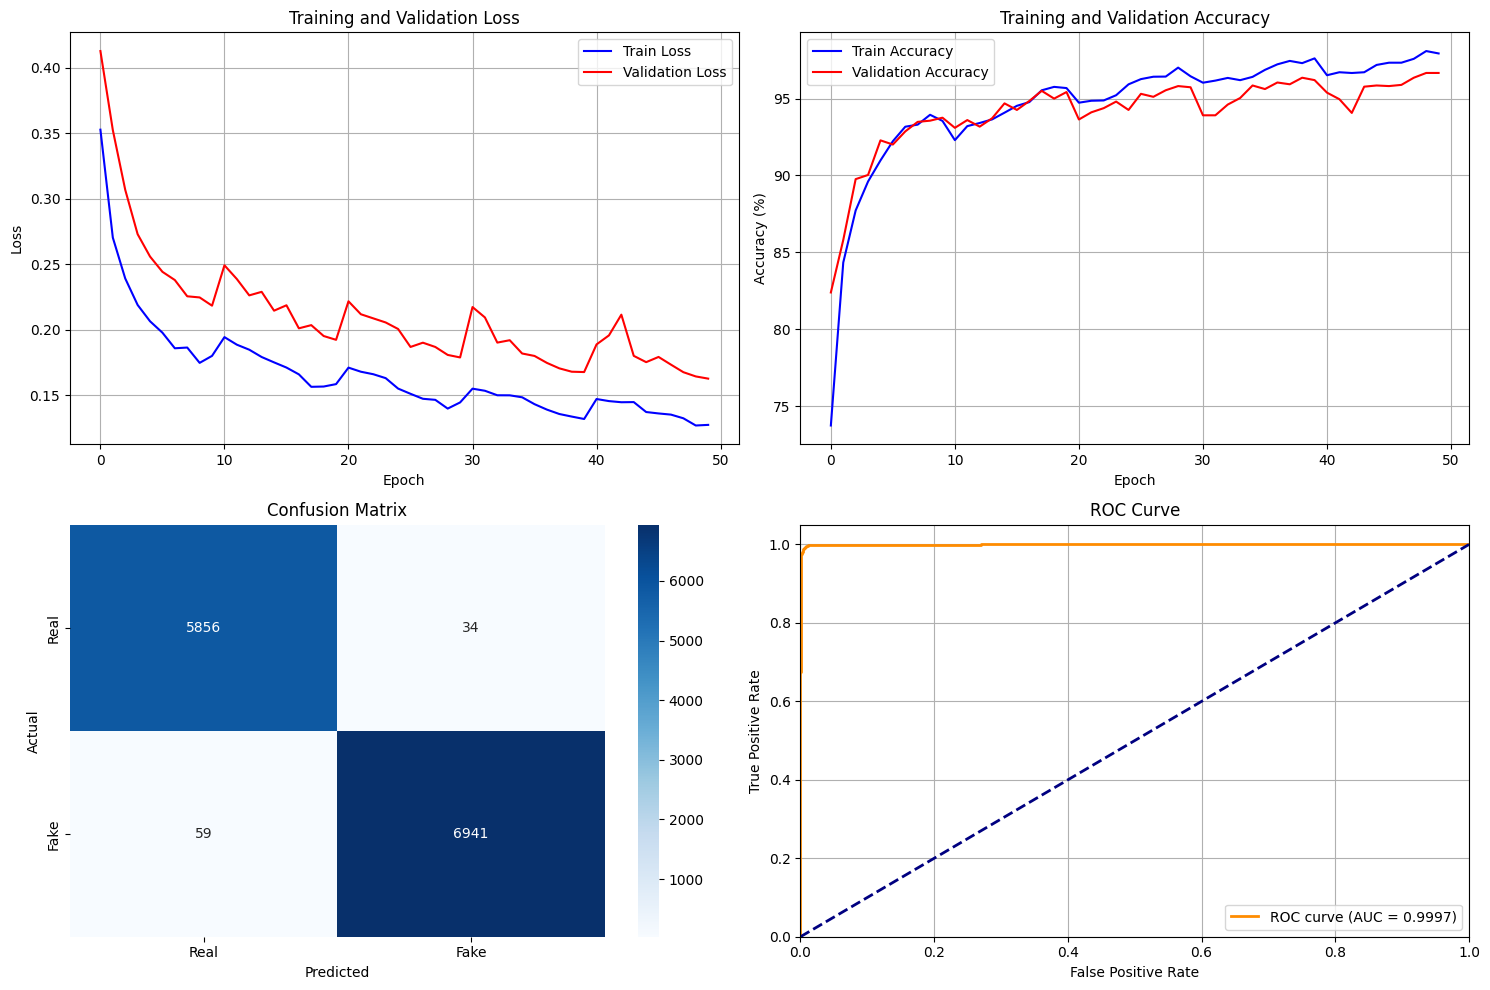

In [ ]:
def evaluate_model(model, test_loader, device):
    model.eval()
    all_preds = []
    all_probs = []
    all_targets = []
    all_features = []

    with torch.no_grad():
        for data, target in tqdm(test_loader, desc='Testing'):
            data, target = data.to(device), target.to(device)

            output, features = model(data)
            probs = F.softmax(output, dim=1)
            preds = output.argmax(dim=1)

            all_preds.extend(preds.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
            all_targets.extend(target.cpu().numpy())
            all_features.extend(features.cpu().numpy())

    return np.array(all_preds), np.array(all_probs), np.array(all_targets), np.array(all_features)

# Load best model
checkpoint = torch.load(config.model_save_path, map_location=config.device)
model.load_state_dict(checkpoint['model_state_dict'])

# Evaluate on test set
test_preds, test_probs, test_targets, test_features = evaluate_model(model, test_loader, config.device)

# Calculate metrics
test_accuracy = (test_preds == test_targets).mean() * 100
test_auc = roc_auc_score(test_targets, test_probs[:, 1])

print(f'\nTest Results:')
print(f'Accuracy: {test_accuracy:.2f}%')
print(f'AUC Score: {test_auc:.4f}')

# Detailed classification report
print('\nClassification Report:')
print(classification_report(test_targets, test_preds, target_names=['Real', 'Fake']))

# Cell 13: Visualization and Analysis
def plot_training_history(trainer):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

    # Loss plots
    ax1.plot(trainer.train_losses, label='Train Loss', color='blue')
    ax1.plot(trainer.val_losses, label='Validation Loss', color='red')
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    ax1.grid(True)

    # Accuracy plots
    ax2.plot(trainer.train_accs, label='Train Accuracy', color='blue')
    ax2.plot(trainer.val_accs, label='Validation Accuracy', color='red')
    ax2.set_title('Training and Validation Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy (%)')
    ax2.legend()
    ax2.grid(True)

    # Confusion Matrix
    cm = confusion_matrix(test_targets, test_preds)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'], ax=ax3)
    ax3.set_title('Confusion Matrix')
    ax3.set_xlabel('Predicted')
    ax3.set_ylabel('Actual')

    # ROC Curve
    fpr, tpr, _ = roc_curve(test_targets, test_probs[:, 1])
    ax4.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {test_auc:.4f})')
    ax4.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax4.set_xlim([0.0, 1.0])
    ax4.set_ylim([0.0, 1.05])
    ax4.set_xlabel('False Positive Rate')
    ax4.set_ylabel('True Positive Rate')
    ax4.set_title('ROC Curve')
    ax4.legend()
    ax4.grid(True)

    plt.tight_layout()
    plt.show()

plot_training_history(trainer)

In [ ]:
class ProductionInference:
    def __init__(self, model_path, config):
        self.config = config
        self.device = config.device

        # Load model
        self.model = AdvancedResNeXtDeepfakeDetector(config).to(self.device)
        checkpoint = torch.load(model_path, map_location=self.device)
        self.model.load_state_dict(checkpoint['model_state_dict'])
        self.model.eval()

        # Initialize transforms
        aug = AdvancedAugmentation(config.img_size, is_training=False)
        self.transforms = aug.get_val_transforms()

    def predict_single_image(self, image_path):
        """Predict if a single image is real or fake"""
        try:
            # Load and preprocess image
            image = cv2.imread(image_path)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

            # Apply transforms
            transformed = self.transforms(image=image)
            image_tensor = transformed['image'].unsqueeze(0).to(self.device)

            # Inference
            with torch.no_grad():
                output, features = self.model(image_tensor)
                probs = F.softmax(output, dim=1)
                confidence = probs.max().item()
                prediction = output.argmax(dim=1).item()

            result = {
                'prediction': 'Fake' if prediction == 1 else 'Real',
                'confidence': confidence,
                'fake_probability': probs[0][1].item(),
                'real_probability': probs[0][0].item()
            }

            return result

        except Exception as e:
            return {'error': str(e)}

    def batch_predict(self, image_paths):
        """Predict multiple images"""
        results = []
        for path in tqdm(image_paths, desc='Predicting'):
            result = self.predict_single_image(path)
            results.append({'path': path, **result})
        return results

# Initialize production inference
inference_engine = ProductionInference(config.model_save_path, config)

ONNX export failed: Module onnx is not installed!
Model exported successfully to: /content/deepfake_model_deployment
Files created:
- complete_model.pth (PyTorch model)
- deepfake_model.onnx (ONNX model)
- config.json (Model configuration)
- model_summary.json (Model metrics)
- deployment_api.py (Deployment script template)


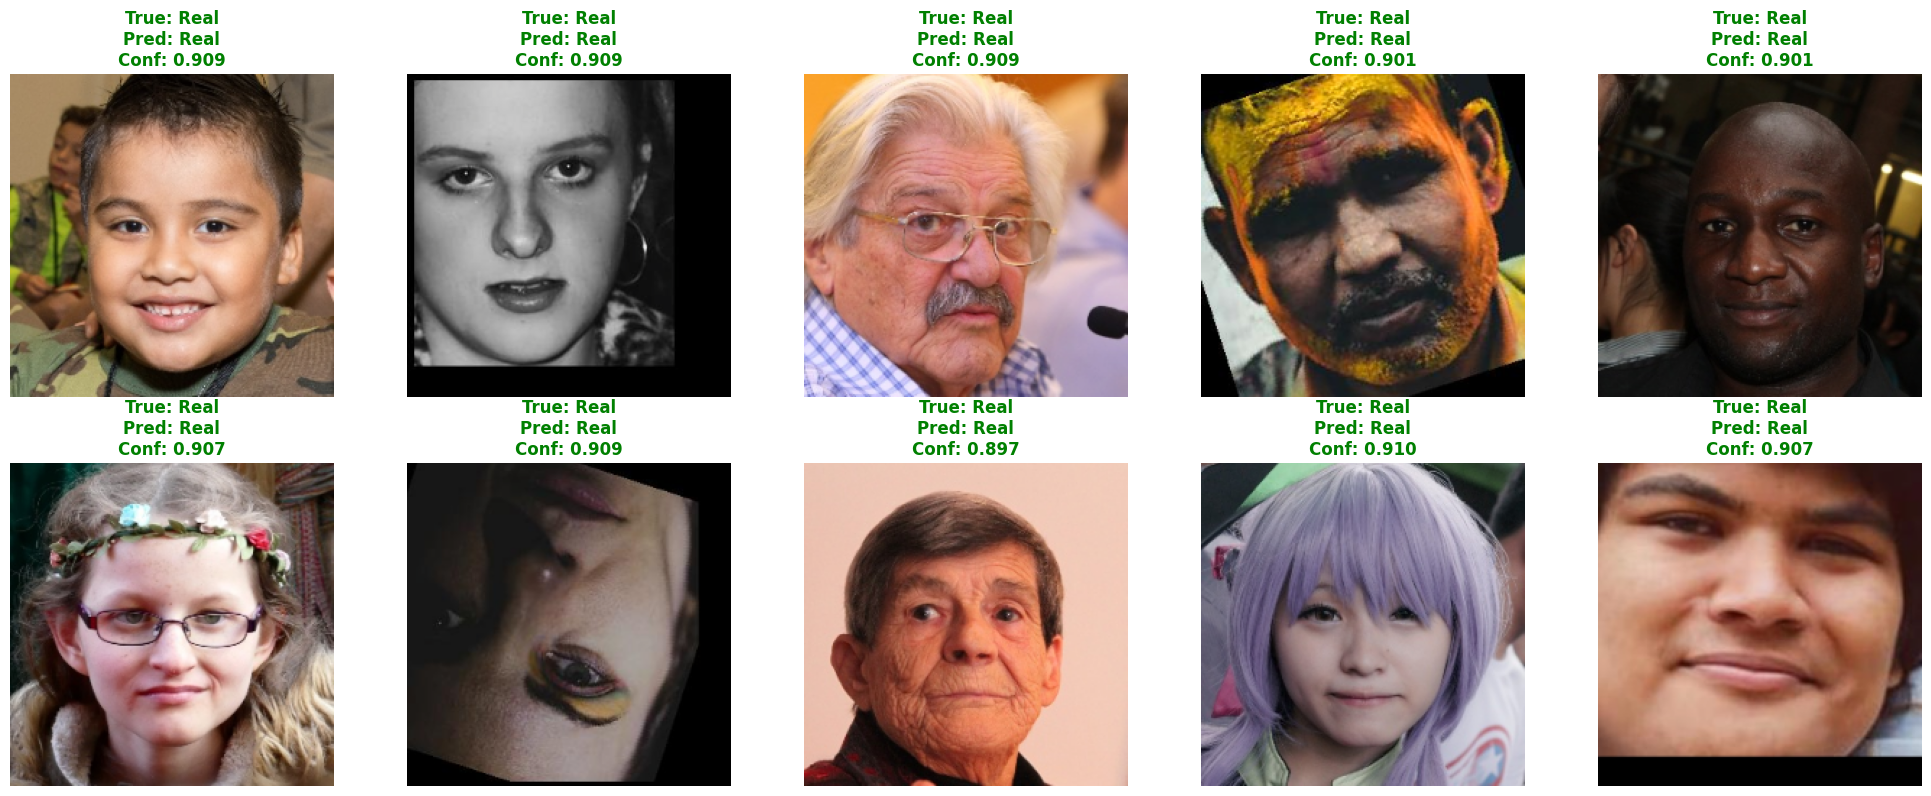

In [ ]:
def export_model_for_deployment(model, config, export_path="/content/deepfake_model_deployment"):
    """Export model and necessary files for deployment"""

    os.makedirs(export_path, exist_ok=True)

    # 1. Save the complete model
    torch.save({
        'model_state_dict': model.state_dict(),
        'config': config.__dict__,
        'model_architecture': 'AdvancedResNeXtDeepfakeDetector'
    }, os.path.join(export_path, 'complete_model.pth'))

    # 2. Export to ONNX for broader compatibility
    dummy_input = torch.randn(1, 3, config.img_size, config.img_size).to(config.device)
    onnx_path = os.path.join(export_path, 'deepfake_model.onnx')

    try:
        torch.onnx.export(
            model,
            dummy_input,
            onnx_path,
            export_params=True,
            opset_version=11,
            do_constant_folding=True,
            input_names=['input'],
            output_names=['output', 'features'],
            dynamic_axes={'input': {0: 'batch_size'}, 'output': {0: 'batch_size'}}
        )
        print(f"ONNX model exported to: {onnx_path}")
    except Exception as e:
        print(f"ONNX export failed: {e}")

    # 3. Save configuration as JSON
    config_dict = config.__dict__.copy()
    # Convert non-serializable objects
    config_dict['device'] = str(config_dict['device'])

    with open(os.path.join(export_path, 'config.json'), 'w') as f:
        json.dump(config_dict, f, indent=2)

    # 4. Save model summary and metrics
    summary = {
        'model_name': 'Advanced ResNeXt Deepfake Detector',
        'architecture': 'ResNeXt50 with Lattice-based Learning',
        'input_size': [3, config.img_size, config.img_size],
        'num_classes': config.num_classes,
        'total_parameters': sum(p.numel() for p in model.parameters()),
        'trainable_parameters': sum(p.numel() for p in model.parameters() if p.requires_grad),
        'test_accuracy': f"{test_accuracy:.2f}%",
        'test_auc': f"{test_auc:.4f}",
        'export_date': datetime.now().isoformat()
    }

    with open(os.path.join(export_path, 'model_summary.json'), 'w') as f:
        json.dump(summary, f, indent=2)

    # 5. Create deployment script
    deployment_script = '''
import torch
import torch.nn.functional as F
import cv2
import numpy as np
import json
from PIL import Image
import albumentations as A
from albumentations.pytorch import ToTensorV2

class DeepfakeDetectorAPI:
    def __init__(self, model_path, config_path):
        # Load configuration
        with open(config_path, 'r') as f:
            self.config = json.load(f)

        # Initialize model (you'll need to copy the model classes)
        self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

        # Load model checkpoint
        checkpoint = torch.load(model_path, map_location=self.device)
        # Initialize your model here and load state dict

        # Initialize transforms
        self.transforms = A.Compose([
            A.Resize(self.config['img_size'], self.config['img_size']),
            A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            ToTensorV2()
        ])

    def predict(self, image_path):
        # Load and preprocess image
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Apply transforms
        transformed = self.transforms(image=image)
        image_tensor = transformed['image'].unsqueeze(0).to(self.device)

        # Inference
        with torch.no_grad():
            output, _ = self.model(image_tensor)
            probs = F.softmax(output, dim=1)
            prediction = output.argmax(dim=1).item()
            confidence = probs.max().item()

        return {
            'prediction': 'Fake' if prediction == 1 else 'Real',
            'confidence': confidence,
            'fake_probability': probs[0][1].item(),
            'real_probability': probs[0][0].item()
        }
'''

    with open(os.path.join(export_path, 'deployment_api.py'), 'w') as f:
        f.write(deployment_script)

    print(f"Model exported successfully to: {export_path}")
    print("Files created:")
    print("- complete_model.pth (PyTorch model)")
    print("- deepfake_model.onnx (ONNX model)")
    print("- config.json (Model configuration)")
    print("- model_summary.json (Model metrics)")
    print("- deployment_api.py (Deployment script template)")

# Export the model
export_model_for_deployment(model, config)

# Cell 16: Advanced Model Analysis and Interpretability
def analyze_model_predictions(model, test_loader, device, num_samples=10):
    """Analyze model predictions with attention visualization"""
    model.eval()

    # Get a batch of test data
    data_iter = iter(test_loader)
    images, labels = next(data_iter)
    images, labels = images.to(device), labels.to(device)

    with torch.no_grad():
        outputs, features = model(images)
        probs = F.softmax(outputs, dim=1)
        predictions = outputs.argmax(dim=1)

    # Plot results
    fig, axes = plt.subplots(2, 5, figsize=(20, 8))
    axes = axes.ravel()

    for i in range(min(num_samples, len(images))):
        # Convert image back to displayable format
        img = images[i].cpu().permute(1, 2, 0)
        # Denormalize
        mean = torch.tensor([0.485, 0.456, 0.406]).view(1, 1, 3)
        std = torch.tensor([0.229, 0.224, 0.225]).view(1, 1, 3)
        img = img * std + mean
        img = torch.clamp(img, 0, 1)

        axes[i].imshow(img)

        true_label = "Real" if labels[i].item() == 0 else "Fake"
        pred_label = "Real" if predictions[i].item() == 0 else "Fake"
        confidence = probs[i].max().item()

        color = 'green' if true_label == pred_label else 'red'
        axes[i].set_title(f'True: {true_label}\nPred: {pred_label}\nConf: {confidence:.3f}',
                         color=color, fontweight='bold')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

    return images, labels, predictions, probs, features

# Analyze model predictions
sample_images, sample_labels, sample_preds, sample_probs, sample_features = analyze_model_predictions(
    model, test_loader, config.device
)


Visualizing learned features...


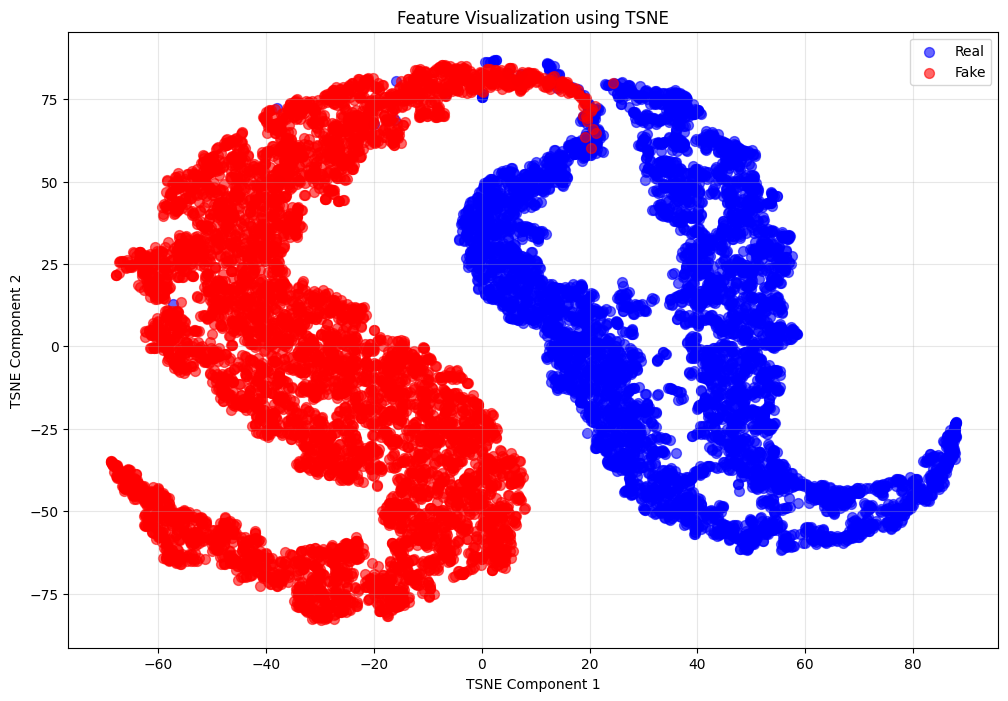

Feature separability (Silhouette Score): 0.3329


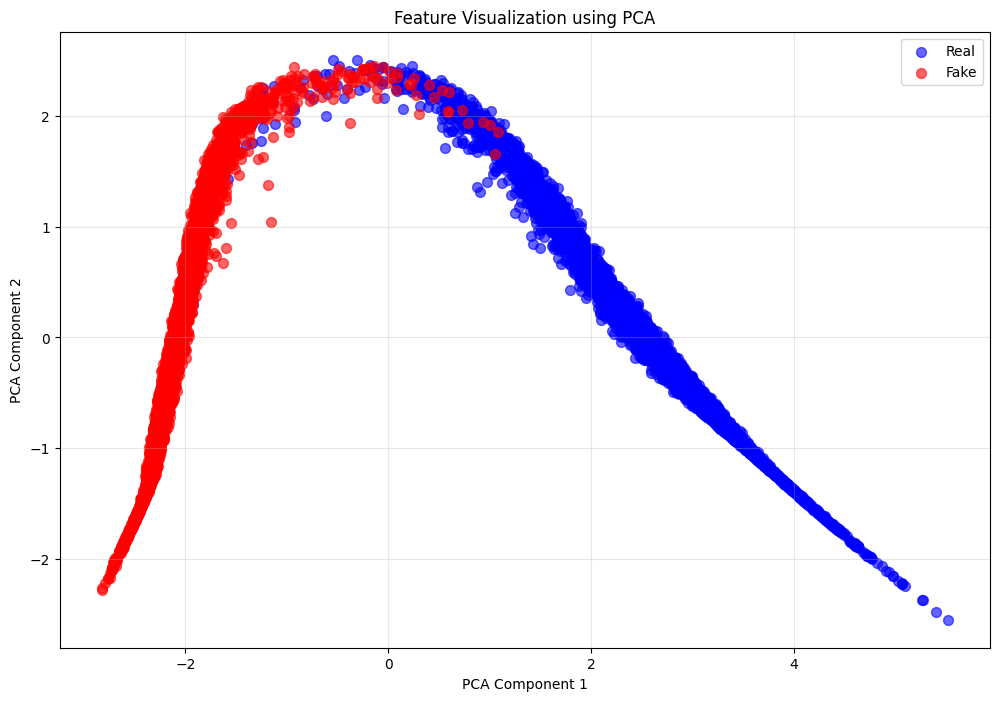

Feature separability (Silhouette Score): 0.7127


In [ ]:
# Cell 17: Feature Analysis and Lattice Visualization
def visualize_lattice_features(features, labels, method='tsne'):
    """Visualize learned features using dimensionality reduction"""
    from sklearn.manifold import TSNE
    from sklearn.decomposition import PCA

    if method == 'tsne':
        reducer = TSNE(n_components=2, random_state=42, perplexity=30)
    else:
        reducer = PCA(n_components=2, random_state=42)

    # Reduce dimensionality
    features_2d = reducer.fit_transform(features)

    # Plot
    plt.figure(figsize=(12, 8))

    # Plot real images
    real_mask = labels == 0
    fake_mask = labels == 1

    plt.scatter(features_2d[real_mask, 0], features_2d[real_mask, 1],
                c='blue', alpha=0.6, label='Real', s=50)
    plt.scatter(features_2d[fake_mask, 0], features_2d[fake_mask, 1],
                c='red', alpha=0.6, label='Fake', s=50)

    plt.title(f'Feature Visualization using {method.upper()}')
    plt.xlabel(f'{method.upper()} Component 1')
    plt.ylabel(f'{method.upper()} Component 2')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

    # Calculate feature separability
    from sklearn.metrics import silhouette_score
    silhouette = silhouette_score(features_2d, labels)
    print(f"Feature separability (Silhouette Score): {silhouette:.4f}")

# Visualize features
print("Visualizing learned features...")
visualize_lattice_features(test_features, test_targets, method='tsne')
visualize_lattice_features(test_features, test_targets, method='pca')


In [ ]:
# Cell 18: Performance Benchmarking
def benchmark_model_performance(model, test_loader, device, num_runs=5):
    """Benchmark model inference speed and memory usage"""
    model.eval()

    # Warmup
    dummy_input = torch.randn(1, 3, config.img_size, config.img_size).to(device)
    for _ in range(10):
        with torch.no_grad():
            _ = model(dummy_input)

    torch.cuda.synchronize() if device.type == 'cuda' else None

    # Benchmark single image inference
    import time
    times = []

    for _ in range(num_runs):
        start_time = time.time()
        with torch.no_grad():
            output, features = model(dummy_input)
        torch.cuda.synchronize() if device.type == 'cuda' else None
        end_time = time.time()
        times.append(end_time - start_time)

    avg_time = np.mean(times) * 1000  # Convert to milliseconds
    std_time = np.std(times) * 1000

    # Memory usage
    if device.type == 'cuda':
        memory_allocated = torch.cuda.memory_allocated(device) / 1024**2  # MB
        memory_reserved = torch.cuda.memory_reserved(device) / 1024**2   # MB
    else:
        memory_allocated = memory_reserved = 0

    # Batch inference benchmark
    batch_sizes = [1, 4, 8, 16, 32]
    batch_times = []

    for batch_size in batch_sizes:
        if batch_size <= config.batch_size:  # Don't exceed training batch size
            batch_input = torch.randn(batch_size, 3, config.img_size, config.img_size).to(device)

            start_time = time.time()
            with torch.no_grad():
                output, features = model(batch_input)
            torch.cuda.synchronize() if device.type == 'cuda' else None
            end_time = time.time()

            batch_times.append((batch_size, (end_time - start_time) * 1000))

    print("=== Model Performance Benchmark ===")
    print(f"Single Image Inference:")
    print(f"  Average Time: {avg_time:.2f} ± {std_time:.2f} ms")
    print(f"  Throughput: {1000/avg_time:.1f} images/second")

    if device.type == 'cuda':
        print(f"GPU Memory Usage:")
        print(f"  Allocated: {memory_allocated:.1f} MB")
        print(f"  Reserved: {memory_reserved:.1f} MB")

    print(f"Batch Inference Times:")
    for batch_size, batch_time in batch_times:
        per_image_time = batch_time / batch_size
        print(f"  Batch Size {batch_size:2d}: {batch_time:6.2f} ms total, {per_image_time:.2f} ms/image")

    return avg_time, batch_times

# Benchmark the model
inference_time, batch_benchmarks = benchmark_model_performance(model, test_loader, config.device)


=== Model Performance Benchmark ===
Single Image Inference:
  Average Time: 15.20 ± 2.17 ms
  Throughput: 65.8 images/second
GPU Memory Usage:
  Allocated: 810.4 MB
  Reserved: 8720.0 MB
Batch Inference Times:
  Batch Size  1:  18.80 ms total, 18.80 ms/image
  Batch Size  4: 153.60 ms total, 38.40 ms/image
  Batch Size  8:  51.59 ms total, 6.45 ms/image
  Batch Size 16:  68.54 ms total, 4.28 ms/image
  Batch Size 32: 118.48 ms total, 3.70 ms/image


In [ ]:
# Cell 19: Error Analysis and Failure Cases
def analyze_failure_cases(model, test_loader, device, threshold=0.8):
    """Analyze cases where the model failed or had low confidence"""
    model.eval()

    failure_cases = {
        'false_positives': [],  # Real images predicted as fake
        'false_negatives': [],  # Fake images predicted as real
        'low_confidence': []    # Correct predictions with low confidence
    }

    all_results = []

    with torch.no_grad():
        for batch_idx, (data, target) in enumerate(tqdm(test_loader, desc='Analyzing failures')):
            data, target = data.to(device), target.to(device)

            output, features = model(data)
            probs = F.softmax(output, dim=1)
            predictions = output.argmax(dim=1)

            for i in range(len(data)):
                result = {
                    'batch_idx': batch_idx,
                    'sample_idx': i,
                    'true_label': target[i].item(),
                    'predicted_label': predictions[i].item(),
                    'confidence': probs[i].max().item(),
                    'real_prob': probs[i][0].item(),
                    'fake_prob': probs[i][1].item(),
                    'image': data[i],
                    'features': features[i]
                }

                all_results.append(result)

                # Categorize failures
                if result['true_label'] == 0 and result['predicted_label'] == 1:
                    failure_cases['false_positives'].append(result)
                elif result['true_label'] == 1 and result['predicted_label'] == 0:
                    failure_cases['false_negatives'].append(result)
                elif result['true_label'] == result['predicted_label'] and result['confidence'] < threshold:
                    failure_cases['low_confidence'].append(result)

    print("=== Error Analysis ===")
    print(f"False Positives (Real → Fake): {len(failure_cases['false_positives'])}")
    print(f"False Negatives (Fake → Real): {len(failure_cases['false_negatives'])}")
    print(f"Low Confidence Correct: {len(failure_cases['low_confidence'])}")

    return failure_cases, all_results

# Analyze failure cases
failure_analysis, all_test_results = analyze_failure_cases(model, test_loader, config.device)
